In [23]:
### IMPORTAR LIBRERÍAS ###
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
### IMPORTAR LOS DATOS ###
people_df = pd.read_csv('People.csv')
fielding_df = pd.read_csv('Fielding.csv')
batting_df = pd.read_csv('Batting.csv')
awards_df = pd.read_csv('AwardsPlayers.csv')
allstar_df = pd.read_csv('AllstarFull.csv')
hof_df = pd.read_csv('HallOfFame.csv')
appearances_df = pd.read_csv('Appearances.csv')

### PROCESAMIENTO DE LOS DATOS

In [25]:
### Analizamos el conjunto de datos people_df ###
#Elimino las columnas que no sean necesarias para el análisis
#playerID, nameFirst, nameLast
columnas_people = ['playerID', 'nameFirst', 'nameLast']
data_final = people_df[columnas_people]

In [26]:
### Analizamos el conjunto de datos batting_df ###
#Determinamos las estadísticas finales de cada jugador
#G, AB, R, H, 2B, 3B, HR, RBI, SB, BB, SO, años jugados
estado_batting = {}
anos_jugados = {}

for i, fila in batting_df.iterrows():
    iden = fila['playerID']
    if iden in estado_batting:
        estado_batting[iden]['G'] = estado_batting[iden]['G'] + fila['G']
        estado_batting[iden]['AB'] = estado_batting[iden]['AB'] + fila['AB']
        estado_batting[iden]['R'] = estado_batting[iden]['R'] + fila['R']
        estado_batting[iden]['H'] = estado_batting[iden]['H'] + fila['H']
        estado_batting[iden]['2B'] = estado_batting[iden]['2B'] + fila['2B']
        estado_batting[iden]['3B'] = estado_batting[iden]['3B'] + fila['3B']
        estado_batting[iden]['HR'] = estado_batting[iden]['HR'] + fila['HR']
        estado_batting[iden]['RBI'] = estado_batting[iden]['RBI'] + fila['RBI']
        estado_batting[iden]['SB'] = estado_batting[iden]['SB'] + fila['SB']
        estado_batting[iden]['BB'] = estado_batting[iden]['BB'] + fila['BB']
        estado_batting[iden]['SO'] = estado_batting[iden]['SO'] + fila['SO']
        anos_jugados[iden].append(fila['yearID'])
    else:
        estado_batting[iden] = {}
        estado_batting[iden]['G'] = fila['G']
        estado_batting[iden]['AB'] = fila['AB']
        estado_batting[iden]['R'] = fila['R']
        estado_batting[iden]['H'] = fila['H']
        estado_batting[iden]['2B'] = fila['2B']
        estado_batting[iden]['3B'] = fila['3B']
        estado_batting[iden]['HR'] = fila['HR']
        estado_batting[iden]['RBI'] = fila['RBI']
        estado_batting[iden]['SB'] = fila['SB']
        estado_batting[iden]['BB'] = fila['BB']
        estado_batting[iden]['SO'] = fila['SO']
        anos_jugados[iden] = []
        anos_jugados[iden].append(fila['yearID'])

In [27]:
#Determinamos los años jugados por cada jugador
for k, v in anos_jugados.items():
    estado_batting[k]['Years_Played'] = len(list(set(v)))

In [28]:
#Convertimos el diccionario en un DataFrame
columnas_batting = pd.DataFrame.from_dict(estado_batting, orient='index')

#Incluimos los datos obtenidos al conjunto de datos final
data_final = data_final.join(columnas_batting, on='playerID', how='outer', rsuffix = 'mstr')

In [29]:
### Analizamos el conjunto de datos fielding_df ###
#Determinamos las estadísticas finales de cada jugador 
#A, E, DP
estado_filding = {}

for i, fila in fielding_df.iterrows():
    iden = fila['playerID']
    if iden in estado_filding:
        estado_filding[iden]['A'] = estado_filding[iden]['A'] + fila['A']
        estado_filding[iden]['E'] = estado_filding[iden]['E'] + fila['E']
        estado_filding[iden]['DP'] = estado_filding[iden]['DP'] + fila['DP']
    else:
        estado_filding[iden] = {}
        estado_filding[iden]['A'] = fila['A']
        estado_filding[iden]['E'] = fila['E']
        estado_filding[iden]['DP'] = fila['DP']

#Convertimos el diccionario en un DataFrame
columnas_fielding = pd.DataFrame.from_dict(estado_filding, orient='index')

In [30]:
#Incluimos los datos obtenidos al conjunto de datos final
data_final = data_final.join(columnas_fielding, on='playerID', how='outer', rsuffix='mstr')
data_final.head()

,playerID,nameFirst,nameLast,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,Years_Played,A,E,DP
0,aardsda01,David,Aardsma,331.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,29.0,3.0,2.0
1,aaronha01,Hank,Aaron,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,240.0,1402.0,1383.0,23.0,429.0,144.0,218.0
2,aaronto01,Tommie,Aaron,437.0,944.0,102.0,216.0,42.0,6.0,13.0,94.0,9.0,86.0,145.0,7.0,113.0,22.0,124.0
3,aasedo01,Don,Aase,448.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,135.0,13.0,10.0
4,abadan01,Andy,Abad,15.0,21.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,3.0,1.0,1.0,3.0


In [31]:
### Analizamos el conjunto de datos awards_df ###
#Determinamos de todos los premios que entrega el béisbol los más importantes
mvp = awards_df[awards_df['awardID'] == 'Most Valuable Player']
roy = awards_df[awards_df['awardID'] == 'Rookie of the Year']
gg = awards_df[awards_df['awardID'] == 'Gold Glove']
ss = awards_df[awards_df['awardID'] == 'Silver Slugger']
ws_mvp = awards_df[awards_df['awardID'] == 'World Series MVP']

list_awards = [mvp,roy,gg,ss,ws_mvp]

#Inicializamos la lista de cada uno de los premios seleccionados
mvp_list = []
roy_list = []    
gg_list = []
ss_list = []
ws_mvp_list = []

lists = [mvp_list,roy_list,gg_list,ss_list,ws_mvp_list]

estado_awards = {}

for index, m in enumerate(list_awards):
      for i, fila in m.iterrows():
          iden = fila['playerID']
          premio = fila['awardID']
          if iden in estado_awards and iden in lists[index]:
              estado_awards[iden][premio] += 1
          else:
              estado_awards[iden] = {}
              lists[index].append(iden)
              estado_awards[iden][premio] = 1

columnas_awards = pd.DataFrame.from_dict(estado_awards, orient='index')

#Incluimos los datos obtenidos al conjunto de datos final
data_final = data_final.join(columnas_awards, on='playerID', how='outer', rsuffix='mstr')
data_final.head()

,playerID,nameFirst,nameLast,G,AB,R,H,2B,3B,HR,...,SO,Years_Played,A,E,DP,Most Valuable Player,Rookie of the Year,Gold Glove,World Series MVP,Silver Slugger
0,aardsda01,David,Aardsma,331.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,9.0,29.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN
1,aaronha01,Hank,Aaron,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,...,1383.0,23.0,429.0,144.0,218.0,NaN,NaN,3.0,NaN,NaN
2,aaronto01,Tommie,Aaron,437.0,944.0,102.0,216.0,42.0,6.0,13.0,...,145.0,7.0,113.0,22.0,124.0,NaN,NaN,NaN,NaN,NaN
3,aasedo01,Don,Aase,448.0,5.0,0.0,0.0,0.0,0.0,0.0,...,3.0,13.0,135.0,13.0,10.0,NaN,NaN,NaN,NaN,NaN
4,abadan01,Andy,Abad,15.0,21.0,1.0,2.0,0.0,0.0,0.0,...,5.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN


In [32]:
### Analizamos el conjunto de datos allstar_df ###
#Participación en el juego de las estrellas
estado_allstar = {}

for i, fila in allstar_df.iterrows():
    iden = fila['playerID']
    if iden in estado_allstar:
        estado_allstar[iden]['allstar'] +=1
    else:
        estado_allstar[iden] = {}
        estado_allstar[iden]['allstar'] = 1
        
#Convertimos el diccionario en un DataFrame
columnas_allstar = pd.DataFrame.from_dict(estado_allstar, orient='index')

#Incluimos los datos obtenidos al conjunto de datos final
data_final = data_final.join(columnas_allstar, on='playerID', how='outer', rsuffix='mstr')
data_final.head()

,playerID,nameFirst,nameLast,G,AB,R,H,2B,3B,HR,...,Years_Played,A,E,DP,Most Valuable Player,Rookie of the Year,Gold Glove,World Series MVP,Silver Slugger,allstar
0,aardsda01,David,Aardsma,331.0,4.0,0.0,0.0,0.0,0.0,0.0,...,9.0,29.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,aaronha01,Hank,Aaron,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,...,23.0,429.0,144.0,218.0,NaN,NaN,3.0,NaN,NaN,24.0
2,aaronto01,Tommie,Aaron,437.0,944.0,102.0,216.0,42.0,6.0,13.0,...,7.0,113.0,22.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN
3,aasedo01,Don,Aase,448.0,5.0,0.0,0.0,0.0,0.0,0.0,...,13.0,135.0,13.0,10.0,NaN,NaN,NaN,NaN,NaN,1.0
4,abadan01,Andy,Abad,15.0,21.0,1.0,2.0,0.0,0.0,0.0,...,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
### Analizamos el conjunto de datos hof_df ###
#Seleccionamos los datos a si fue inducido el voto y que sea un jugador
hof_df = hof_df[(hof_df['inducted'] == 'Y') & (hof_df['category'] == 'Player')] 

estado_hof = {}

for i, fila in hof_df.iterrows():
    iden = fila['playerID']
    if iden in estado_hof:
        estado_hof[iden]['hof'] += 1
    else:
        estado_hof[iden] = {}
        estado_hof[iden]['hof'] = 1
        
#Convertimos el diccionario en un DataFrame
columnas_hof = pd.DataFrame.from_dict(estado_hof, orient='index')

#Incluimos los datos obtenidos al conjunto de datos final
data_final = data_final.join(columnas_hof, on='playerID', how='outer', rsuffix='mstr')
data_final.head()

,playerID,nameFirst,nameLast,G,AB,R,H,2B,3B,HR,...,A,E,DP,Most Valuable Player,Rookie of the Year,Gold Glove,World Series MVP,Silver Slugger,allstar,hof
0,aardsda01,David,Aardsma,331.0,4.0,0.0,0.0,0.0,0.0,0.0,...,29.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaronha01,Hank,Aaron,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,...,429.0,144.0,218.0,NaN,NaN,3.0,NaN,NaN,24.0,1.0
2,aaronto01,Tommie,Aaron,437.0,944.0,102.0,216.0,42.0,6.0,13.0,...,113.0,22.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aasedo01,Don,Aase,448.0,5.0,0.0,0.0,0.0,0.0,0.0,...,135.0,13.0,10.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,abadan01,Andy,Abad,15.0,21.0,1.0,2.0,0.0,0.0,0.0,...,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
### Analizamos el conjunto de datos appearances_df ###
#Determinamos las estadísticas finales de cada jugador
#G_all
estado_appearances = {}

for i, fila in appearances_df.iterrows():
    iden = fila['playerID']
    if iden in estado_appearances:
        estado_appearances[iden]['G_all'] = estado_appearances[iden]['G_all'] + fila['G_all']
    else:
        estado_appearances[iden] = {}
        estado_appearances[iden]['G_all'] = fila['G_all']

#Convertimos el diccionario en un DataFrame
columnas_appearances = pd.DataFrame.from_dict(estado_appearances, orient = 'index')

#Incluimos los datos obtenidos al conjunto de datos final
data_final = data_final.join(columnas_appearances, on='playerID', how='outer', rsuffix='mstr')
data_final.head()

,playerID,nameFirst,nameLast,G,AB,R,H,2B,3B,HR,...,E,DP,Most Valuable Player,Rookie of the Year,Gold Glove,World Series MVP,Silver Slugger,allstar,hof,G_all
0.0,aardsda01,David,Aardsma,331.0,4.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331.0
1.0,aaronha01,Hank,Aaron,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,...,144.0,218.0,NaN,NaN,3.0,NaN,NaN,24.0,1.0,3298.0
2.0,aaronto01,Tommie,Aaron,437.0,944.0,102.0,216.0,42.0,6.0,13.0,...,22.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437.0
3.0,aasedo01,Don,Aase,448.0,5.0,0.0,0.0,0.0,0.0,0.0,...,13.0,10.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,448.0
4.0,abadan01,Andy,Abad,15.0,21.0,1.0,2.0,0.0,0.0,0.0,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


### ANALIZAR LOS DATOS

In [35]:
#Analizamos el conjunto de datos data_final
#Conocer la forma de los datos
print(data_final.shape)

(19879, 26)


In [36]:
#Conocer el formato de los datos
data_final.dtypes

playerID                 object
nameFirst                object
nameLast                 object
G                       float64
AB                      float64
R                       float64
H                       float64
2B                      float64
3B                      float64
HR                      float64
RBI                     float64
SB                      float64
BB                      float64
SO                      float64
Years_Played            float64
A                       float64
E                       float64
DP                      float64
Most Valuable Player    float64
Rookie of the Year      float64
Gold Glove              float64
World Series MVP        float64
Silver Slugger          float64
allstar                 float64
hof                     float64
G_all                   float64
dtype: object

In [37]:
#Conocer los datos nulos
data_final.isnull().sum()

playerID                    0
nameFirst                  38
nameLast                    1
G                         190
AB                        190
R                         190
H                         190
2B                        190
3B                        190
HR                        190
RBI                       714
SB                       1089
BB                        190
SO                       1453
Years_Played              190
A                         388
E                         389
DP                        388
Most Valuable Player    19820
Rookie of the Year      19793
Gold Glove              19670
World Series MVP        19817
Silver Slugger          19591
allstar                 18012
hof                     19623
G_all                     189
dtype: int64

In [38]:
#Reemplazo los valores nulos por 0
fill_null = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO',
              'Years_Played', 'A', 'E', 'DP', 'Most Valuable Player',
              'Rookie of the Year', 'Gold Glove', 'World Series MVP',
              'Silver Slugger', 'allstar', 'hof', 'G_all']

for col in fill_null:
    data_final[col] = data_final[col].fillna(0)
    
data_final.head()

,playerID,nameFirst,nameLast,G,AB,R,H,2B,3B,HR,...,E,DP,Most Valuable Player,Rookie of the Year,Gold Glove,World Series MVP,Silver Slugger,allstar,hof,G_all
0.0,aardsda01,David,Aardsma,331.0,4.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331.0
1.0,aaronha01,Hank,Aaron,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,...,144.0,218.0,0.0,0.0,3.0,0.0,0.0,24.0,1.0,3298.0
2.0,aaronto01,Tommie,Aaron,437.0,944.0,102.0,216.0,42.0,6.0,13.0,...,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437.0
3.0,aasedo01,Don,Aase,448.0,5.0,0.0,0.0,0.0,0.0,0.0,...,13.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,448.0
4.0,abadan01,Andy,Abad,15.0,21.0,1.0,2.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


### VISUALIZACIÓN DE LOS DATOS

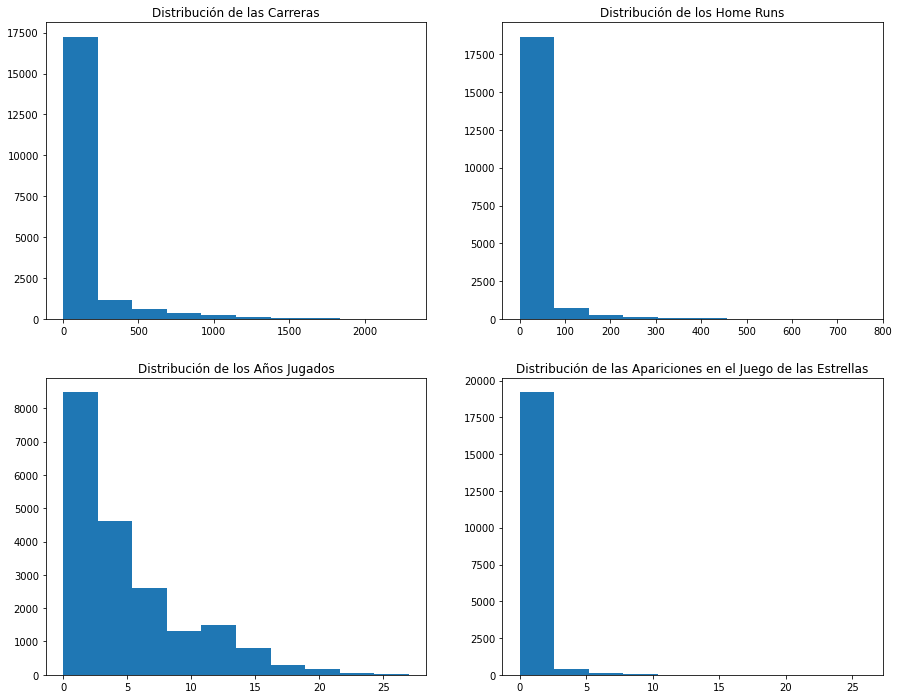

In [39]:
#Creamos varios histogramas para visualizar las carreras, home runs, 
#años jugados y los juegos de las estrellas
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(data_final['R'])
ax1.set_title('Distribución de las Carreras')
ax2.hist(data_final['HR'])
ax2.set_title('Distribución de los Home Runs')
ax3.hist(data_final['Years_Played'])
ax3.set_title('Distribución de los Años Jugados')
ax4.hist(data_final['allstar'])
ax4.set_title('Distribución de las Apariciones en el Juego de las Estrellas')
plt.show()

In [40]:
data_final = data_final.drop(columns=['playerID','nameFirst','nameLast'])
data_final.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,BB,...,E,DP,Most Valuable Player,Rookie of the Year,Gold Glove,World Series MVP,Silver Slugger,allstar,hof,G_all
0.0,331.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331.0
1.0,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,240.0,1402.0,...,144.0,218.0,0.0,0.0,3.0,0.0,0.0,24.0,1.0,3298.0
2.0,437.0,944.0,102.0,216.0,42.0,6.0,13.0,94.0,9.0,86.0,...,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437.0
3.0,448.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,448.0
4.0,15.0,21.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


### ANÁLISIS DE MACHINE LEARNING

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

In [42]:
#Definir las variables dependientes e independientes
y = data_final['hof']
X = data_final.drop('hof', axis =1)

In [43]:
#Separar los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [44]:
# Analisis discriminante lineal para mejorar el modelo
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [45]:
#Definir el algoritmo
algoritmo = LogisticRegression()

#Entrenar el algoritmo
algoritmo.fit(X_train, y_train)

#Realizar una predicción
y_test_pred = algoritmo.predict(X_test)

In [46]:
#Se calcula la exactitud y la precisión del modelo
print("Exactitud del modelo: ")
print(accuracy_score(y_test, y_test_pred))
print("Precisión del modelo: ")
print(precision_score(y_test, y_test_pred))

Exactitud del modelo: 
0.9894366197183099
Precisión del modelo: 
0.7619047619047619
